You need to have specific versions installed for the end result to be able to be converted to a format Tensorflow JS can use.
- `pip install tensorflow==2.15.0`
- `pip install tensorflow_decision_forests==1.8.1`

# Load and Preprocess MNIST Data
Load MNIST dataset using keras.datasets, normalize pixel values, and prepare training/test splits.

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Print the shapes of the datasets
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


# Build Neural Network Model
Create a sequential model with dense layers, including input layer, hidden layers, and output layer for digit classification.

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Flatten

# Build the neural network model
model = Sequential([
    # Input layer
    Flatten(input_shape=(28, 28)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    # Output layer with 10 neurons (one for each digit) and softmax activation
    Dense(10, activation='softmax')
])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 10)                170       
                                                                 
Total params: 53018 (207.10 KB)
Trainable params: 53018 (207.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2024-12-21 10:43:29.094089: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0a:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-12-21 10:43:29.167289: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


# Configure Training Parameters
Set up model compilation with optimizer, loss function, and metrics for training.

In [4]:
# Configure Training Parameters
model.compile(
    optimizer='adam',  # Use Adam optimizer
    loss='sparse_categorical_crossentropy',  # Use sparse categorical crossentropy as the loss function
    metrics=['accuracy']  # Track accuracy during training
)

# Train the Model
Train the neural network on the MNIST training data with specified batch size and epochs.

In [5]:
# Train the Model
batch_size = 64  # Set the batch size
epochs = 10  # Set the number of epochs

# Train the model on the training data
history = model.fit(
    x_train, y_train,  # Training data and labels
    batch_size=batch_size,  # Batch size
    epochs=epochs,  # Number of epochs
    validation_data=(x_test, y_test)  # Validation data and labels
)

# Print the training history keys
print(history.history.keys())

Epoch 1/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3942 - accuracy: 0.8820 - val_loss: 0.2123 - val_accuracy: 0.9360
Epoch 2/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1671 - accuracy: 0.9514 - val_loss: 0.1482 - val_accuracy: 0.9557
Epoch 3/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1222 - accuracy: 0.9632 - val_loss: 0.1155 - val_accuracy: 0.9644
Epoch 4/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0969 - accuracy: 0.9706 - val_loss: 0.1081 - val_accuracy: 0.9681
Epoch 5/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0798 - accuracy: 0.9759 - val_loss: 0.0943 - val_accuracy: 0.9728
Epoch 6/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0671 - accuracy: 0.9792 - val_loss: 0.0994 - val_accuracy: 0.9712
Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0572 - accuracy: 0.9821 - val_loss: 0.0918 - val_accuracy: 0.9740
Epoch 

# Evaluate Model Performance
Test the model's performance on the test dataset and display accuracy metrics.

313/313 - 0s - loss: 0.1014 - accuracy: 0.9726 - 292ms/epoch - 934us/step
Test accuracy: 0.9726


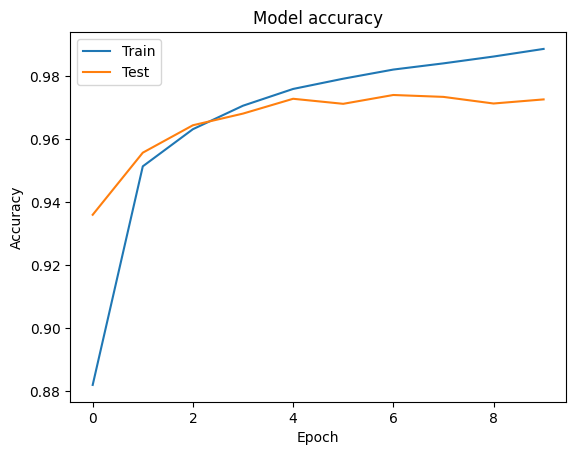

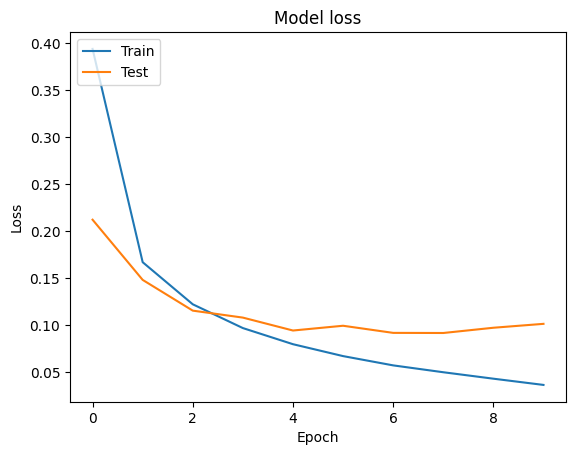

In [6]:
# Evaluate Model Performance

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)

# Print the test accuracy
print(f"Test accuracy: {test_accuracy:.4f}")

# Plot training & validation accuracy values
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Visualize Predictions
Display sample test images and their predicted digits alongside true labels.

313/313 [==============================] - 0s 905us/step


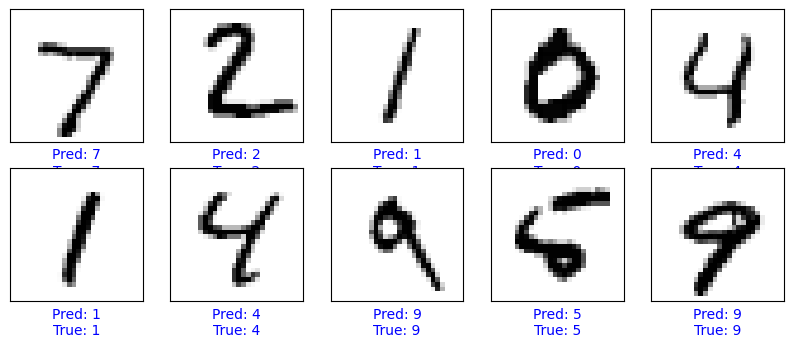

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Predict the labels for the test set
predictions = model.predict(x_test)

# Function to plot images along with their predicted and true labels
def plot_images(images, true_labels, predicted_labels, num_images=10):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        predicted_label = np.argmax(predicted_labels[i])
        true_label = true_labels[i]
        color = 'blue' if predicted_label == true_label else 'red'
        plt.xlabel(f"Pred: {predicted_label}\nTrue: {true_label}", color=color)
    plt.show()

# Plot sample test images with their predicted and true labels
plot_images(x_test, y_test, predictions)

In [11]:
import tensorflow as tf
import tensorflowjs as tfjs

# model.save('numbers.h5')
tfjs.converters.save_keras_model(model, "tfjs_numbers")

### old
# # Print model details before export
# print("Input shape:", model.input_shape)

# print("\nModel Summary:")
# model.summary()

# # Verify input layer configuration
# input_layer = model.layers[0]
# print("\nInput layer config:", input_layer.get_config())

# # Export with shape verification
# tfjs.converters.save_keras_model(model, "numbers")

# # Verify exported model.json (optional)
# import json
# with open('tfjs_model/model.json', 'r') as f:
#     model_json = json.load(f)
#     print("\nExported model input shape:", model_json)
#         #   model_json['config']['layers'][0]['config']['batch_input_shape'])


Pretty sure this last bit is not needed.

In [9]:
# !tensorflowjs_converter --input_format=keras numbers.h5 tfjs_numbers

2024-12-21 10:45:12.833829: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-21 10:45:12.833902: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-21 10:45:12.834910: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-21 10:45:13.426353: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
